# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     763.3
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.20e-39
Time:                        10:40:51   Log-Likelihood:                -3.0907
No. Observations:                  50   AIC:                             14.18
Df Residuals:                      46   BIC:                             21.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0685      0.091     55.413      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.56969544  5.05256923  5.49545738  5.87049958  6.15989016  6.35880349
  6.47618688  6.53329049  6.56017605  6.59077777  6.65732703  6.7850569
  6.9880564   7.26695569  7.60882257  7.98928718  8.37654591  8.73658664
  9.03877686  9.26089644  9.39278841  9.43802766  9.41333366  9.34582343
  9.26855632  9.21510248  9.21402733  9.28419837  9.43168532  9.64876282
  9.91517977 10.20148646 10.47387309 10.69972466 10.85297947 10.91841103
 10.89412968 10.79189311 10.63517457 10.45530628 10.28633166 10.15941207
 10.09770709 10.11256947 10.20167991 10.34942812 10.52947752 10.70909229
 10.85451576 10.93651654]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.9223895  10.77352177 10.50996096 10.17739301  9.83595669  9.54551953
  9.35102017  9.2714658   9.29527855  9.38313014]


## Plot comparison

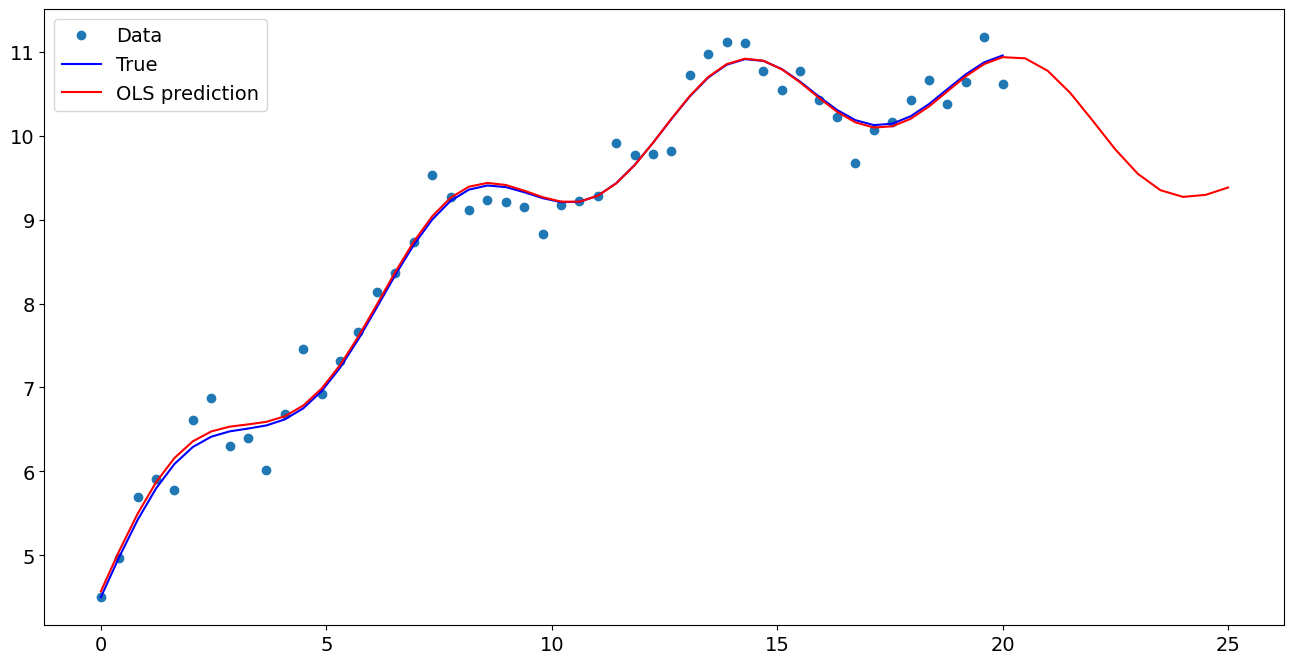

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.068506
x1                  0.494530
np.sin(x1)          0.511207
I((x1 - 5) ** 2)   -0.019952
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.922389
1    10.773522
2    10.509961
3    10.177393
4     9.835957
5     9.545520
6     9.351020
7     9.271466
8     9.295279
9     9.383130
dtype: float64